**Digikala Orders**

The dataset contains customer orders from the Digikala online shopping platform in Iran.

***Business Objective*** |
***Understanding customer behaviour to improve sales and marketing strategies***


By examining the orders, it is possible to learn more about client preferences, buying habits, and long-term trends. Using this data, solutions can also be tailored to particular consumer categories.



## Data Preprocessing and Cleaning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/orders.csv'

df = pd.read_csv(data_path)

In [ ]:
df

,ID_Order,ID_Customer,ID_Items,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [ ]:
df.head()

,ID_Order,ID_Customer,ID_Items,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Items               200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [ ]:
# Determine if there are missing columns and which columns have missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: ", missing_cols)

Columns with missing values:  []


In [ ]:
# Determine if there are duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicated rows: ", duplicate_rows)

Duplicated rows:  Empty DataFrame
Columns: [ID_Order, ID_Customer, ID_Items, DateTime_CartFinalize, Amount_Gross_Order, city_name_fa, Quantity_item]
Index: []


In [ ]:
# Perform label encoding on city names in native language

le = LabelEncoder()
le.fit(df['city_name_fa'])
df['city_name_encoded'] = le.transform(df['city_name_fa'])

tempIndex = df.columns.get_loc('city_name_fa')
tempCol = df.pop('city_name_encoded')

df.insert(tempIndex, 'city_name_encoded', tempCol)

df

,ID_Order,ID_Customer,ID_Items,DateTime_CartFinalize,Amount_Gross_Order,city_name_encoded,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,638,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,262,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,582,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,593,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,215,تهران,1.0
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,215,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,637,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,76,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,744,همدان,1.0


In [ ]:
# Checking the frequency of Cities
freq = df['city_name_encoded'].value_counts()
freq

215    108306
654      6024
76       5992
815      5934
97       4313
        ...  
592         1
655         1
807         1
632         1
289         1
Name: city_name_encoded, Length: 906, dtype: int64

In [ ]:
# Change DateTime_CartFinalize to DateTime
df['Date_Time'] = pd.to_datetime(df['DateTime_CartFinalize'], format='%Y-%m-%d')

df.drop('DateTime_CartFinalize',axis=1, inplace=True)

df

,ID_Order,ID_Customer,ID_Items,Amount_Gross_Order,city_name_encoded,city_name_fa,Quantity_item,Date_Time
0,2714054,469662,21386,597982.0,638,محمود آباد,1.0,2015-10-15 08:50:56
1,11104039,3063877,248497,980000.0,262,خرمدره,1.0,2018-02-11 00:29:26
2,4228130,3184893,50144,229358.0,582,قرچک,1.0,2016-06-14 00:30:08
3,22225624,6888562,70208,16514.0,593,قم,1.0,2018-09-03 14:37:19
4,4068771,2533490,67627,133028.0,215,تهران,1.0,2016-05-21 11:51:02
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,344037.0,215,تهران,2.0,2018-04-03 12:07:01
199996,4425393,3745774,131645,600000.0,637,محمدیه,1.0,2016-07-09 19:14:09
199997,6671889,4845514,215045,450000.0,76,اصفهان,1.0,2017-03-08 23:47:06
199998,6315995,2541418,264021,193486.0,744,همدان,1.0,2017-02-08 14:59:39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID_Order            200000 non-null  int64         
 1   ID_Customer         200000 non-null  int64         
 2   ID_Items            200000 non-null  int64         
 3   Amount_Gross_Order  200000 non-null  float64       
 4   city_name_encoded   200000 non-null  int64         
 5   city_name_fa        200000 non-null  object        
 6   Quantity_item       200000 non-null  float64       
 7   Date_Time           200000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 12.2+ MB


In [ ]:
# Frequency check of Customer IDs
freq = df['ID_Customer'].value_counts()
freq

957912     150
1153061     91
509634      45
1145709     40
4782393     37
          ... 
4175021      1
665901       1
616157       1
879237       1
4845514      1
Name: ID_Customer, Length: 151634, dtype: int64

In [ ]:
# Frequency check of Item IDs
freq = df['ID_Items'].value_counts()
freq

294942    481
36871     367
51778     288
45121     259
8289      233
         ... 
852152      1
647077      1
209008      1
211540      1
264021      1
Name: ID_Items, Length: 95232, dtype: int64

In [ ]:
# Frequency check of Date
freq = df['Date_Time'].value_counts()
freq

2017-05-07 16:07:39    4
2016-02-23 09:03:50    4
2016-05-17 17:40:25    4
2016-06-06 02:12:05    4
2016-02-29 13:23:57    4
                      ..
2018-07-21 18:47:10    1
2017-12-19 20:44:03    1
2016-09-07 14:52:27    1
2017-11-05 09:25:29    1
2017-06-17 10:08:06    1
Name: Date_Time, Length: 197293, dtype: int64

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID_Order            200000 non-null  int64         
 1   ID_Customer         200000 non-null  int64         
 2   ID_Items            200000 non-null  int64         
 3   Amount_Gross_Order  200000 non-null  float64       
 4   city_name_encoded   200000 non-null  int64         
 5   city_name_fa        200000 non-null  object        
 6   Quantity_item       200000 non-null  float64       
 7   Date_Time           200000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 12.2+ MB


In [ ]:
df.describe(include='all').T

<ipython-input-32-0dd56a246831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ID_Order,200000.0,NaN,NaN,NaN,NaT,NaT,9871963.25273,6404275.164418,1000411.0,5022252.75,8591270.0,12460366.0,24846558.0
ID_Customer,200000.0,NaN,NaN,NaN,NaT,NaT,2860671.082805,1921815.271033,466132.0,1021053.0,2895180.5,4179218.0,7282118.0
ID_Items,200000.0,NaN,NaN,NaN,NaT,NaT,375731.267395,394846.233897,76.0,89557.25,230221.0,519266.75,2093722.0
Amount_Gross_Order,200000.0,NaN,NaN,NaN,NaT,NaT,1458204.043815,5450972.068803,0.0,121273.0,321101.0,1011032.25,1530000000.0
city_name_encoded,200000.0,NaN,NaN,NaN,NaT,NaT,320.72813,222.822967,0.0,215.0,215.0,399.0,905.0
city_name_fa,200000,906,تهران,108306,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity_item,200000.0,NaN,NaN,NaN,NaT,NaT,1.261225,1.801186,1.0,1.0,1.0,1.0,500.0
Date_Time,200000,197293,2017-05-07 16:07:39,4,2013-09-27 12:03:00,2018-12-11 04:47:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Date_Time'].max()
orders_filtered = df[df['Date_Time']<='2018-11-30']

<ipython-input-34-1feb1005c0e4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


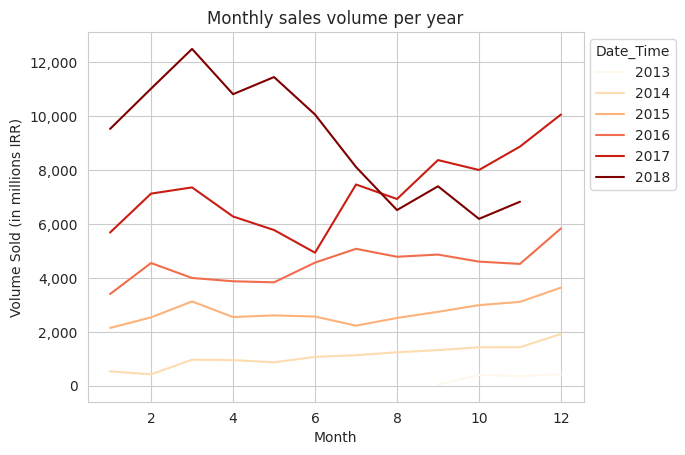

In [ ]:
to_plot = orders_filtered.groupby([df.Date_Time.dt.year, df.Date_Time.dt.month])['Amount_Gross_Order'].sum()


ax = sns.lineplot(x=to_plot.index.get_level_values(1), y=to_plot.values, hue=to_plot.index.get_level_values(0), palette='OrRd')
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Monthly sales volume per year')
plt.xlabel('Month')
plt.ylabel('Volume Sold (in millions IRR)')
plt.show()

The Monthly sales volume per year graph shows a decline in sales volume since May 2018. Historically, sales volume typically decreases after the first quarter of the year, but by November there is usually a positive change in volume compared to January. However, 2018 was different from previous years as there was no such increase in volume.

In [ ]:
orders_unique = pd.DataFrame(df.groupby(['ID_Order', 'ID_Customer', 'Date_Time'])['Amount_Gross_Order'].sum()).reset_index()
orders_filtered['orders_per_customer'] = df['ID_Customer'].map(orders_unique['ID_Customer'].value_counts())
orders_filtered['orders_per_customer'] = ['more than one order made' if x > 1 else 'one order made' for x in orders_filtered['orders_per_customer']]

<ipython-input-35-b22b98de7bbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_filtered['orders_per_customer'] = df['ID_Customer'].map(orders_unique['ID_Customer'].value_counts())
<ipython-input-35-b22b98de7bbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_filtered['orders_per_customer'] = ['more than one order made' if x > 1 else 'one order made' for x in orders_filtered['orders_per_customer']]


In [ ]:
to_plot = orders_filtered[orders_filtered['Amount_Gross_Order'] < 40000000].groupby('orders_per_customer').agg(
{
'ID_Customer': pd.Series.nunique, 'Amount_Gross_Order' : np.sum, 'ID_Order': pd.Series.nunique, 'ID_Items' : 'count'}
)
to_plot.reset_index(inplace=True)

In [ ]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

def get_dates(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

def plot_cohort(df):
    cohort = df.copy()
    cohort['PurchaseMonth'] = cohort['Date_Time'].apply(get_month)
    grouping = cohort.groupby('ID_Customer')['PurchaseMonth']
    cohort['CohortMonth'] = grouping.transform(min)
    purchase_year, purchase_month, _ = get_dates(cohort, 'PurchaseMonth')
    cohort_year, cohort_month, _ = get_dates(cohort, 'CohortMonth')
    years_diff = purchase_year - cohort_year
    months_diff = purchase_month - cohort_month
    cohort['CohortIndex'] = years_diff * 12 + months_diff +1
    cohort_data = cohort.groupby(['CohortMonth','CohortIndex'])['ID_Customer']
    cohort_data = cohort_data.apply(pd.Series.nunique)
    cohort_data = cohort_data.reset_index()
    cohort_data = cohort_data.pivot(index='CohortMonth', columns='CohortIndex')
    pd.options.display.float_format = '{:,.2f}'.format
    cohort_sizes = cohort_data.iloc[:,0]
    retention = cohort_data.divide(cohort_sizes, axis=0).droplevel(None, axis=1)
    retention.columns.name = 'Months since first purchase'
    retention.index.name = 'Month of first purchase'
    retention.index = retention.index.astype('str')
    retention.index
    plt.figure(figsize=(10,5))
    sns.heatmap(data=retention, vmin=0.0, vmax=0.18,annot=True, fmt='.1%')
    plt.show()

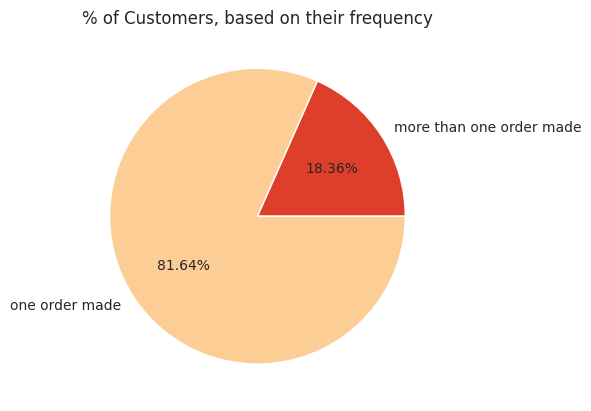

In [ ]:
colors = sns.color_palette('OrRd')[-2:0:-3]

colors

ax = plt.pie(to_plot['ID_Customer'], labels=to_plot['orders_per_customer'], autopct='%.2f%%', colors=colors)
plt.title('% of Customers, based on their frequency')

plt.show()

Based on the pie graph above, 81.64% of the customers ordered only once, while 18.36% ordered more than once

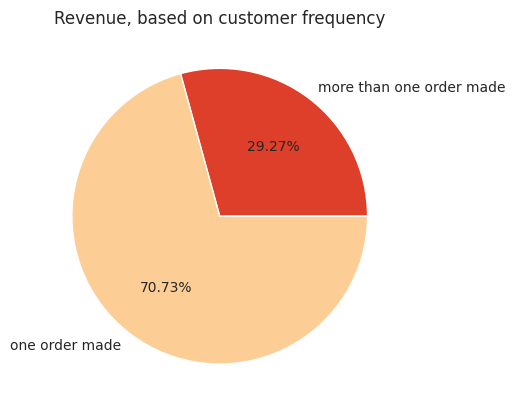

In [ ]:
ax = plt.pie(to_plot['Amount_Gross_Order'], labels=to_plot['orders_per_customer'], autopct='%.2f%%', colors=colors)
plt.title('Revenue, based on customer frequency')

plt.show()

According to the charts, it is evident that the majority of customers make only one purchase from Digikala. This implies that the company's revenue is highly reliant on attracting new customers every month. Therefore, the company has to allocate resources towards marketing and onboarding thousands of new customers every month, even though most of them are likely to make just one purchase and not return again.

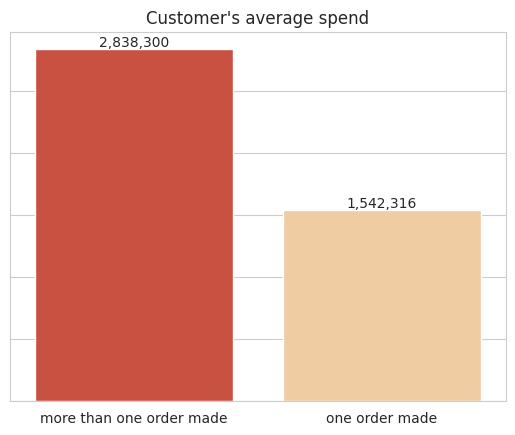

In [ ]:
to_plot['average_spent_per_customer'] = to_plot['Amount_Gross_Order'] / to_plot['ID_Customer']

ax = sns.barplot(data=to_plot, x='orders_per_customer', y='average_spent_per_customer', estimator='sum', palette=colors)
ax.set(title="Customer\'s average spend", yticklabels=[])
ax.set_ylabel(None)
ax.set_xlabel(None)

for c in ax.containers:
    ax.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues])

Customers who placed multiple orders spent almost double the amount compared to those who only made a single purchase, despite the fact that these repeat customers may not necessarily be loyal as they tend to stop shopping with the store after their first month of purchase. Therefore, it is crucial for us to focus on retaining our existing customers and motivating them to make more purchases as our top priority.

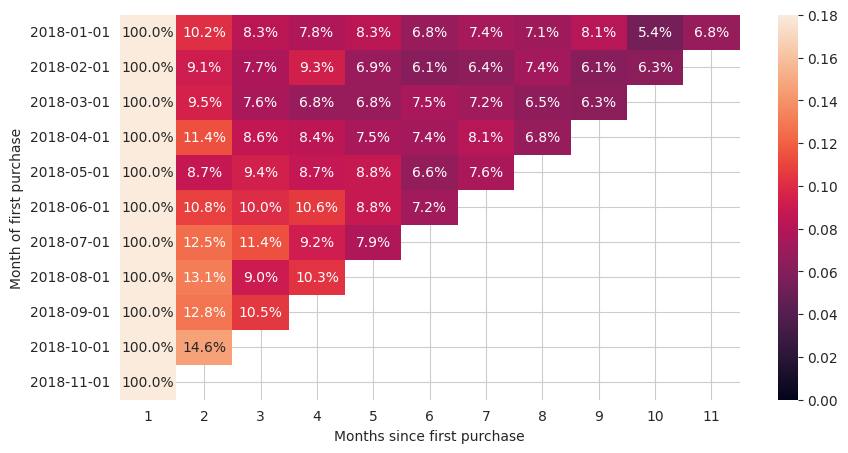

In [ ]:
orders_plot_more_than_one_customers = orders_filtered[(orders_filtered['Date_Time'] >= '2018-01-01') \
                                                      & (orders_filtered['orders_per_customer'] == 'more than one order made')]

plot_cohort(orders_plot_more_than_one_customers)

The cohort chart indicates that in 2018, almost 90% of customers who had made two or more purchases did not make any additional purchases in the following month. This highlights the significance of customer retention and loyalty for the long-term success of a business.

# RFM Model using K-Means Clustering


Customers have varying purchasing patterns and behaviors. To develop an effective strategy, it is crucial to address the specific needs of each customer and understand how they interact with the business. To achieve this, we will utilize the RFM Analysis technique to segment customers into groups based on Recency, Frequency, and Monetization. By doing so, we can identify the most significant and relevant customer groups to the business.

In [ ]:
def drop_outliers(x, column):

    first_q = np.percentile(x[column],25, interpolation='midpoint')
    third_q = np.percentile(x[column],75, interpolation='midpoint')
    iqr = third_q - first_q
    upper = third_q + iqr* 1.5
    lower = first_q - iqr * 1.5

    return x[(x[column] < upper) & (x[column] > lower)]

In [ ]:
snapshot_date = df['Date_Time'].max()

customers = df.groupby('ID_Customer').agg(

    frequency = ('ID_Order',pd.Series.nunique),
    recency= ('Date_Time', lambda x : (snapshot_date - x.max()).days+1),
    monetization = ('Amount_Gross_Order',np.sum),
    tenure = ('Date_Time', lambda x : (snapshot_date - x.min()).days+1)
)

customers = drop_outliers(customers, 'monetization')

customers = customers[customers['monetization'] != 0]

<ipython-input-42-a374cb1d6646>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  first_q = np.percentile(x[column],25, interpolation='midpoint')
<ipython-input-42-a374cb1d6646>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  third_q = np.percentile(x[column],75, interpolation='midpoint')


<Axes: xlabel='recency', ylabel='tenure'>

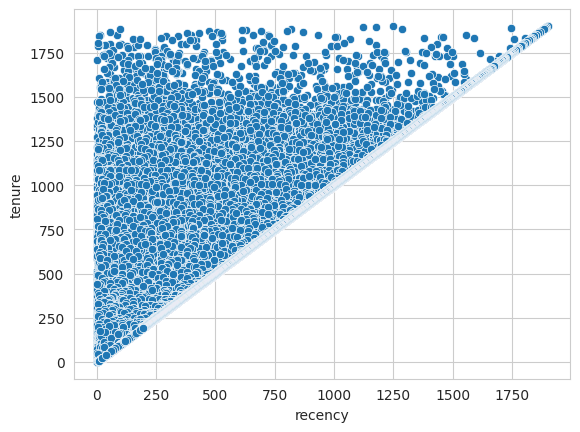

In [ ]:
sns.scatterplot(data=customers, x='recency', y='tenure')

In [ ]:
import scipy.stats as stats

stats.pearsonr(customers['recency'], customers['tenure'])

PearsonRResult(statistic=0.8709371024966335, pvalue=0.0)

In [ ]:
customers_normalized = customers.iloc[:,1:3].copy()

<Axes: xlabel='monetization', ylabel='Count'>

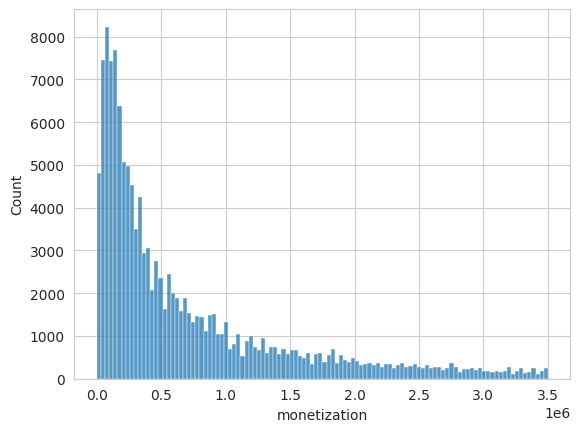

In [ ]:
sns.histplot(data=customers_normalized, x='monetization')

<Axes: xlabel='recency', ylabel='Count'>

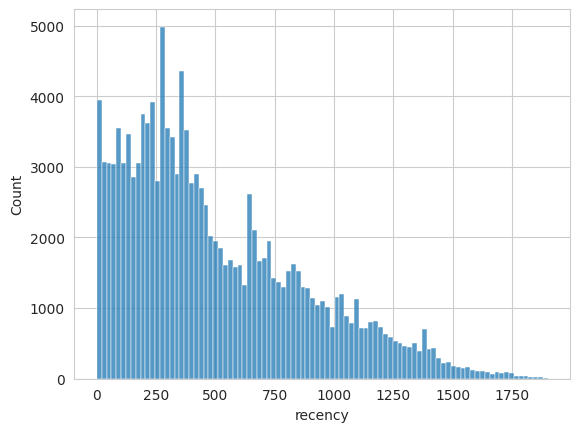

In [ ]:
sns.histplot(data=customers_normalized, x='recency')

In [ ]:
boxcox = pd.Series(stats.boxcox(customers_normalized['monetization'])[0]).skew()
sqrt = pd.Series(np.sqrt(customers_normalized['monetization'])).skew()
log = pd.Series(np.log(customers_normalized['monetization'])).skew()

print(boxcox, sqrt, log)

-0.007492579423409039 0.7817816807799267 -1.2878329810718563


In [ ]:
boxcox = pd.Series(stats.boxcox(customers_normalized['recency'])[0]).skew()
sqrt = pd.Series(np.sqrt(customers_normalized['recency'])).skew()
log = pd.Series(np.log(customers_normalized['recency'])).skew()

print(boxcox, sqrt, log)

-0.09327573489215954 0.09576582849099631 -1.4277304420052654


<Axes: ylabel='Count'>

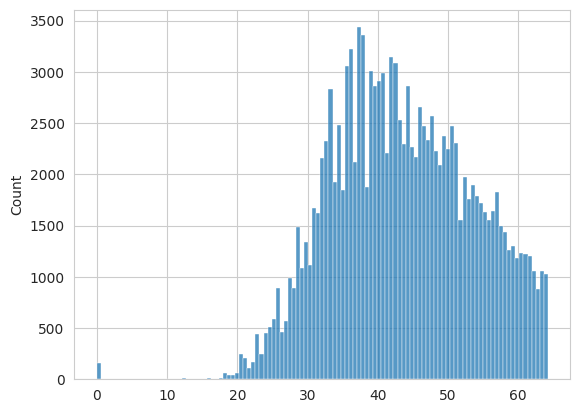

In [ ]:
sns.histplot(stats.boxcox(customers_normalized['monetization'])[0])

<Axes: ylabel='Count'>

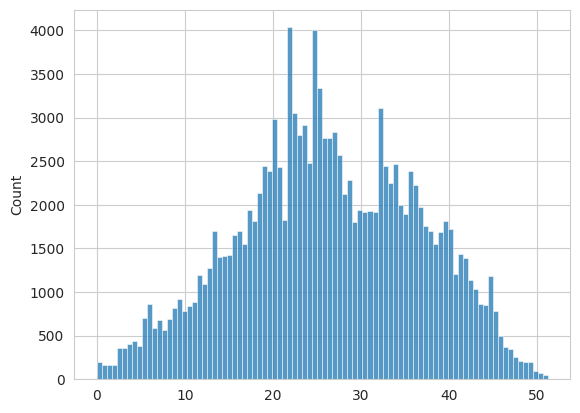

In [ ]:
sns.histplot(stats.boxcox(customers_normalized['recency'])[0])

In [ ]:
customers_normalized['monetization'] = stats.boxcox(customers_normalized['monetization'])[0]
customers_normalized['recency'] = stats.boxcox(customers_normalized['recency'])[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(customers_normalized)
customers_normalized = scaler.transform(customers_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

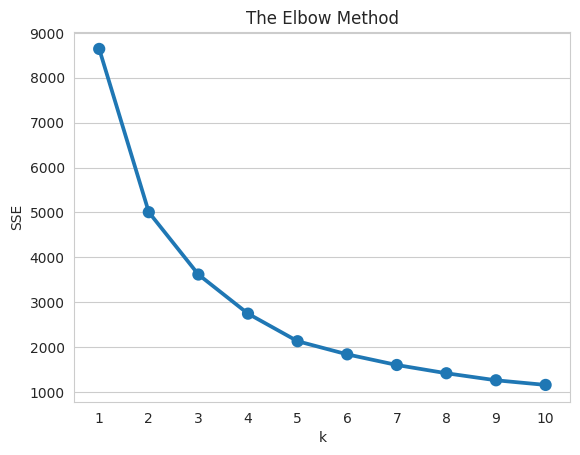

In [ ]:
from sklearn.cluster import KMeans

sse = {}
# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):

    # Initialize KMeans with k clusters and fit it
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(customers_normalized)

    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_

# Add the plot title, x and y axis labels
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(customers_normalized)

cluster_labels = kmeans.labels_

customers = customers.assign(Cluster=cluster_labels)

# Group by cluster
grouped = customers.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetization': 'mean',
    'tenure': ['mean', 'count']

  }).round(1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


recency frequency monetization tenure       
           mean      mean         mean   mean  count
Cluster                                             
0         68.40      1.50   633,692.20 199.10  20317
1        925.50      1.20 1,274,821.60 964.40  23176
2        324.50      1.10   190,709.30 359.90  35622
3        917.00      1.10   156,014.10 929.30  26309
4        309.60      1.50 1,442,187.00 431.30  28478

Seen above is our Cluster Table, and we will now proceed to interpret each group. It should be noted that we have included a new variable, Tenure, which measures the number of days since a customer's first purchase.

<ipython-input-57-59994d9249e0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_yticklabels(ylabels)


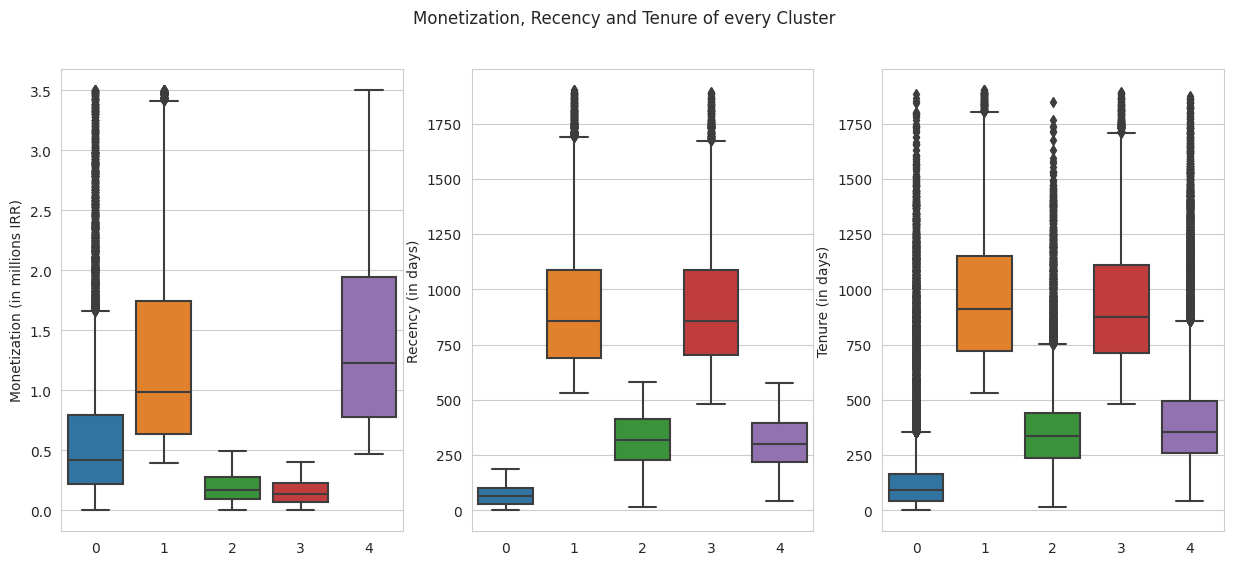

In [ ]:

figure, axs = plt.subplots(1,3, figsize=(15,6))

fig1 = sns.boxplot(data=customers, y='monetization', x='Cluster', ax=axs[0])
fig2 = sns.boxplot(data=customers, y='recency', x='Cluster', ax=axs[1])
fig3 = sns.boxplot(data=customers, y='tenure', x='Cluster', ax=axs[2])

ylabels = ['{:,.1f}'.format(x) for x in fig1.get_yticks()/1000000]
fig1.set(xlabel=None, ylabel='Monetization (in millions IRR)')


fig1.set_yticklabels(ylabels)

fig2.set(xlabel=None, ylabel = 'Recency (in days)')
fig3.set(xlabel=None, ylabel = 'Tenure (in days)')

figure.suptitle('Monetization, Recency and Tenure of every Cluster')
plt.show()

**Cluster 0:** This group consists of new customers who have recently joined the business. It is crucial to provide them with a positive onboarding experience to encourage them to stay and spend more. Cross-selling and up-selling strategies can be effective in increasing their spending. Additionally, there are several outliers in the Monetization box, which may indicate new customers who are spending more than the average new client. We will further subgroup this cluster later.

**Cluster 1:** These are old customers who have not returned to the store. Given that the data ranges from 2013 to 2018, it is possible that some of these customers may be from previous years. Since this cluster is the second biggest spender, it is essential to devise a strategy to bring them back, such as a welcome-back campaign.

**Cluster 2:** This cluster comprises customers who spent a small amount, but some time ago.

**Cluster 3:** Similar to Cluster 2, but with even more time passed since their last purchase.

**Cluster 4:** This cluster consists of customers who, on average, spend more than any other cluster. Although their Recency and Tenure box range is broad, their mean Recency is over 250 days. It is essential for the business to retain the most recent customers and re-engage those who have not made a purchase in a long time.

In [ ]:
customers['frequency'] = ['more than one order made' if x > 1 else 'one order made' for x in customers['frequency']]

<ipython-input-59-836936b055f9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


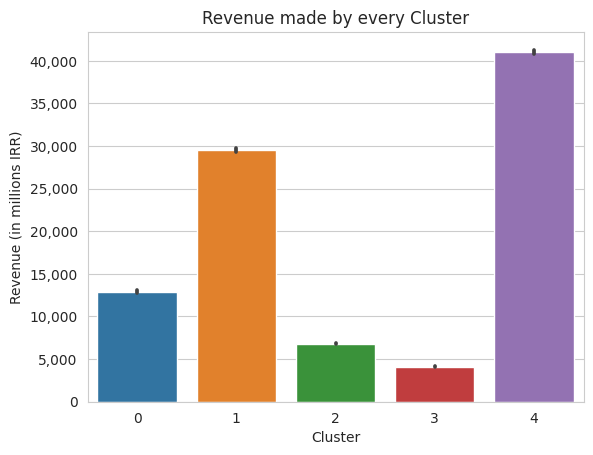

In [ ]:
ax = sns.barplot(data=customers, x='Cluster', y='monetization', estimator='sum')
ax.set(title='Revenue made by every Cluster', ylabel='Revenue (in millions IRR)')
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)

plt.show()

After analyzing the revenue generated by each customer cluster, it is apparent that our focus should be on clusters 0, 1, and 4.

In [ ]:
customers.loc[(customers['Cluster'] == 0)&(customers['monetization'] > 1700000), 'Cluster'] = 0.2

<ipython-input-61-51d2ff06222b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_yticklabels(ylabels)


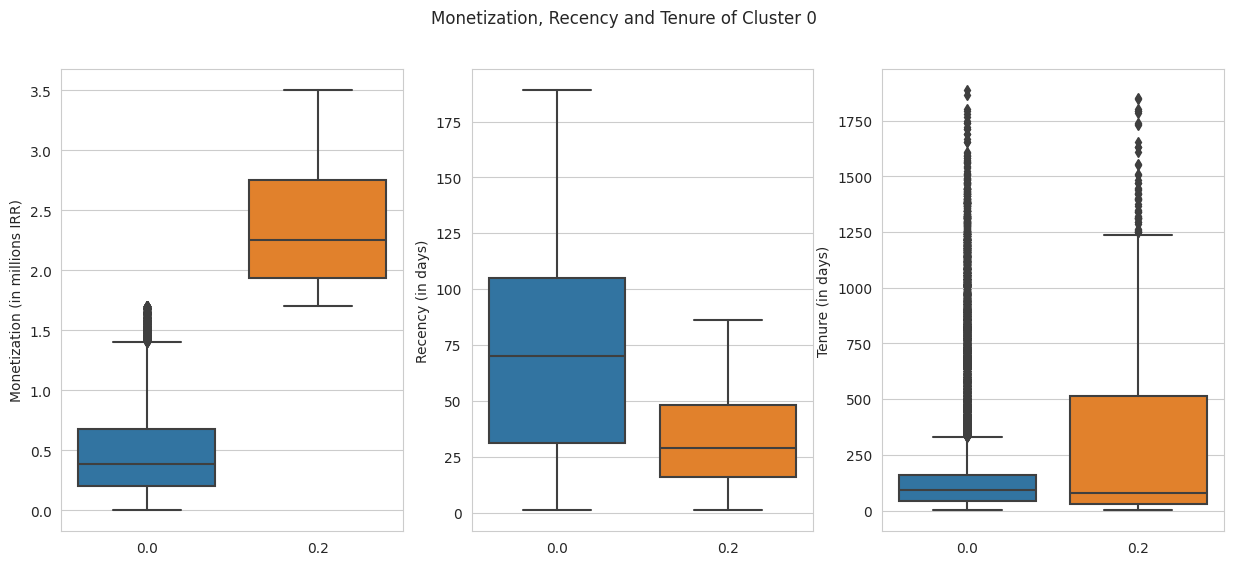

In [ ]:
customers_cluster_0 = customers[(customers['Cluster'] == 0) | (customers['Cluster'] == 0.2)]

figure, axs = plt.subplots(1,3, figsize=(15,6))

fig1 = sns.boxplot(data=customers_cluster_0, y='monetization', x='Cluster', ax=axs[0])
fig2 = sns.boxplot(data=customers_cluster_0, y='recency', x='Cluster', ax=axs[1])
fig3 = sns.boxplot(data=customers_cluster_0, y='tenure', x='Cluster', ax=axs[2])

ylabels = ['{:,.1f}'.format(x) for x in fig1.get_yticks()/1000000]
fig1.set(xlabel=None, ylabel='Monetization (in millions IRR)')


fig1.set_yticklabels(ylabels)

fig2.set(xlabel=None, ylabel = 'Recency (in days)')
fig3.set(xlabel=None, ylabel = 'Tenure (in days)')

figure.suptitle('Monetization, Recency and Tenure of Cluster 0')
plt.show()

Customers belonging to Subgroup 0.2 are the ones who spend more, have made a purchase recently, and have been buying from the business for a longer time. Therefore, these customers are considered VIP customers.

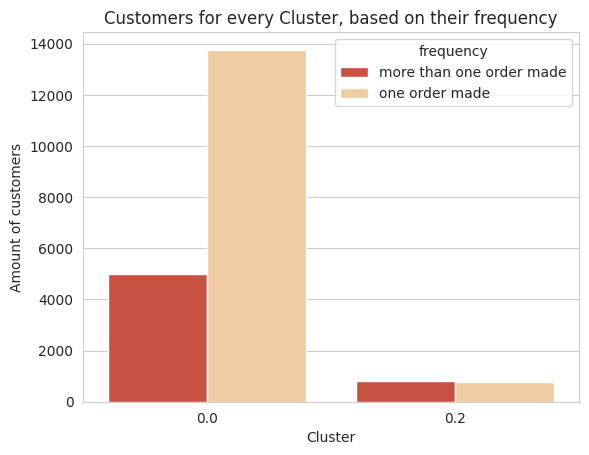

In [ ]:
cust_0_grouped = customers_cluster_0.groupby(['Cluster', 'frequency'])['tenure'].count().reset_index()

ax = sns.barplot(data=cust_0_grouped, x='Cluster', y='tenure', estimator='sum', hue='frequency', palette=colors)
ax.set(title='Customers for every Cluster, based on their frequency', ylabel='Amount of customers')
plt.show()